# BINF TP3 - Algorithmes d'alignement par paire

Dans ce TP nous allons manipuler les algorithmes d'alignement par paire.

# Exercice 0 - Echauffement

Q1. Donnez le score de la superposition :

|       |       |
| :---: | :---: |
x       | ATGTCATGA---TAC |
y       | AT--CTAAATGTTAC |


étant donne le schéma d'évaluation :

|       | A     | T     | G     | C     |
| :---: | :---: | :---: | :---: | :---: |
| **A** | 1     | -1    | -1    | -1    |
| **T** | -1    | 1     | -1    | -1    |
| **G** | -1    | -1    | 1     | -1    |
| **C** | -1    | -1    | -1    | 1     |

et

$\gamma(g) = 0.5 |g| + 0.5$

```markdown
0,5
```

Q2. Alignez les séquences suivantes avec l'algorithme de Levenshtein :  x = ATG et y = ACTG.

```markdown
x= A-TG y= ACTG
```

Q3.	Alignez les séquences suivantes avec l'algorithme de Needleman-Wunsch global x = TAT et y = ATGAC en considérant le schéma d'évaluation suivant

|       | A       | T       | G       | C     |
| :---: | :---:   | :---:   | :---:   | :---: |
| **A** | 1       | -0.5    | -0.5    | -0.5  |
| **T** | -0.5    | 1       | -0.5    | -0.5  |
| **G** | -0.5    | -0.5    | 1       | -0.5  |
| **C** | -0.5    | -0.5    | -0.5    | 1     |

et

$\gamma(g) = 0.5 |g|$


```markdown
x= -T-AT y= ATGAC
```

Q4. Alignez les séquences suivantes avec l'algorithme de Smith-Waterman x = TTGG y = ATGAC en utilisant le schéma d'évaluation de la question précédente.


```markdown
Votre réponse ici
```

# Exercice 1 : Algorithme de Levenshtein - version récursive

Q1. Ecrivez une fonction

levenshtein(x: str, y: str) -> int

qui retourne la distance de Levenshtein entre les séquences x et y en utilisant la  version récursive de l'algorithme.

In [14]:
def levenshtein(x: str, y: str) -> int:
    if not x:
        return len(y)
    if not y:
        return len(x)

    if x[-1] == y[-1]:
        return levenshtein(x[:-1], y[:-1])

    return 1 + min(
        levenshtein(x[:-1], y),
        levenshtein(x, y[:-1]),
        levenshtein(x[:-1], y[:-1])
    )
print(levenshtein("CCAG","CA"))
print(levenshtein("CCGT","CGTCA"))
id1= "ATGGTGAGCAAGGGCGAGGAGGATAACATGGCCATCATCAAGGAGTTCATGCGCTTCAAGGTGCACATGGAGGGCTCCGTGAACGGCCACGAGTTCGAGATCGAGGGCGAGGGCGAGGGCCGCCCCTACGAGGGCACCCAGACCGCCAAGCTGAAGGTGACCAAGGGTGGCCCCCTGCCCTTCGCCTGGGACATCCTGTCCCCTCAGTTCATGTACGGCTCCAAGGCCTACGTGAAGCACCCCGCCGACATCCCCGACTACTTGAAGCTGTCCTTCCCCGAGGGCTTCAAGTGGGAGCGCGTGATGAACTTCGAGGACGGCGGCGTGGTGACCGTGACCCAGGACTCCTCCCTGCAGGACGGCGAGTTCATCTACAAGGTGAAGCTGCGCGGCACCAACTTCCCCTCCGACGGCCCCGTAATGCAGAAGAAGACCATGGGCTGGGAGGCCTCCTCCGAGCGGATGTACCCCGAGGACGGCGCCCTGAAGGGCGAGATCAAGCAGAGGCTGAAGCTGAAGGACGGCGGCCACTACGACGCTGAGGTCAAGACCACCTACAAGGCCAAGAAGCCCGTGCAGCTGCCCGGCGCCTACAACGTCAACATCAAGTTGGACATCACCTCCCACAACGAGGACTACACCATCGTGGAACAGTACGAACGCGCCGAGGGCCGCCACTCCACCGGCGGCATGGACGAGCTGTACAAGTAA"
id2="ATGGTCTCCTTCAAATCTCTCCTAGTTCTCTGTTGCGCTGCCCTTGGGGCATTCGCTACGAAGAGAATGAGTAAAGGAGAAGAACTTTTCACTGGAGTTGTCCCAATTCTTGTTGAATTAGATGGTGATGTTAATGGGCACAAATTTTCTGTCAGTGGAGAGGGTGAAGGTGATGCAACATACGGAAAACTTACCCTTAAATTTATTTGCACTACTGGAAAACTACCTGTTCCATGGCCAACACTTGTCACTACTTTCACCTATGGTGTTCAATGCTTTTCAAGATACCCAGATCATATGAAGCGGCACGACTTCTTCAAGAGCGCCATGCCTGAGGGATACGTGCAGGAGAGGACCATCTTCTTCAAAGACGACGGGAACTACAAGACACGTGCTGAAGTCAAGTTTGAGGGAGACACCCTCGTCAACAGGATCGAGCTTAAGGGAATCGATTTCAAGGAGGACGGAAACATCCTCGGCCACAAGTTGGAATACAACTACAACTCCCACAACGTATACATCATGGCCGACAAGCAAAAGAACGGCATCAAAGCCAACTTCAAGACCCGCCACAACATCGAAGACGGCGGCGTGCAACTCGCTGATCATTATCAACAAAATACTCCAATTGGCGATGGCCCTGTCCTTTTACCAGACAACCATTACCTGTCCACACAATCTGCCCTTTCGAAAGATCCCAACGAAAAGAGAGACCACATGGTCCTTCTTGAGTTTGTAACAGCTGCTGGGATTACACATGGCATGGATGAACTATACAAATAA"
#print(levenshtein(id1, id2))

2
3


Q2. Vous pouvez tester votre code sur les exemples suivants:


*   $L('CCAG', 'CA') = 2$
*   $L('CCGT', 'CGTCA') = 3$
*   $L(AY678264^*, OQ870305^*) = 310$

$^*$ ids genbank de deux sequences.

# Exercice 2 : Algorithme de Smith-Waterman - version itérative

Q1. Ecrivez la fonction

sw_fwd(x: str, y: str, cmap: dict, sigma: array, (go, ge): list) -> (array, array)

qui construit les matrices $S$ et $B$ en utilisant l'algorithme de Smith-Waterman pour aligner les séquences x et y suivant le schéma d'évaluation donné par la matrice de substitution $\Sigma$ et la fonction d'évaluation des trous $\gamma(n)= g_o + g_e \times n$. Le dictionnaire cmap donne la position des différents nucléotides dans la matrice $\Sigma$. La fonction retourne la paire de matrices de score $S$ et de retour $B$.

In [39]:
import numpy as np

def sw_fwd(x, y, cmap, sigma, go, ge):
    m, n = len(x), len(y)
    S = np.zeros((m + 1, n + 1))
    B = np.zeros((m + 1, n + 1), dtype=int)

    for i in range(1, m + 1):
        S[i][0] = 0
    for j in range(1, n + 1):
        S[0][j] = 0

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            match = S[i - 1][j - 1] + sigma[cmap[x[i - 1]], cmap[y[j - 1]]]
            delete = S[i - 1][j] - go - ge * (i - 1)
            insert = S[i][j - 1] - go - ge * (j - 1)

            S[i][j] = np.max([0, match, delete, insert])
            B[i][j] = np.argmax([0, match, delete, insert])

    return S, B





Q2. Ecrivez la fonction

sw_bwd(x: str, y: str, S: array, B: array) -> (str, str, float)

qui effectue l'etape de retour de l'algorithme de Smith-Waterman etant donné les séquences $x$ et $y$ et les matrices de score $S$ et de retour $B$. La fonction retourne un tuple contenant les alignements des séquences x et y et le score de l'alignement.

In [24]:
def sw_bwd(x, y, S, B):
    i, j = np.unravel_index(np.argmax(S), S.shape)
    align_x, align_y = [], []
    score = S[i, j]

    while S[i, j] != 0:
        if B[i, j] == 1:
            align_x.append(x[i-1])
            align_y.append(y[j-1])
            i -= 1
            j -= 1
        elif B[i, j] == 2:
            align_x.append(x[i-1])
            align_y.append('-')
            i -= 1
        elif B[i, j] == 3:
            align_x.append('-')
            align_y.append(y[j-1])
            j -= 1

    return ''.join(align_x[::-1]), ''.join((align_y[::-1])), score


Q3. Vous pouvez tester votre code en utilisant le schéma d'évaluation suivant :

In [11]:
cmap = {"A": 0, "T": 1, "G": 2, "C": 3}
m = np.array([[1, -0.5, -0.5, -0.5],
              [-0.5, 1, -0.5, -0.5],
              [-0.5, -0.5, 1, -0.5],
              [-0.5, -0.5, -0.5, 1]])
go = 0
ge = 0.5


In [40]:
S, B = sw_fwd("TCGC", "CTTAG", cmap, m, go, ge)
x, y, score = sw_bwd("TCGC", "CTTAG", S, B)
print(x)
print(y)
print(score)

TCG
TAG
1.5


*   $SW('TCGC', 'CTTAG')$ retourne un score de $1.5$ à la position $(3,5)$ et l'alignement

In [16]:
from IPython.display import HTML
HTML("<table align='left' style='font-family:Courier New'><tr><th>x:</th><th>TCG</th></tr><tr><th>y:</th><th>TAG</th></tr></table>")

x:,TCG
y:,TAG


*   $SW(AY678264^*, OQ870305^*)$ retourne un score de $342.1$ à la position $(708,717)$ et l'alignement

In [17]:
from IPython.display import HTML
HTML("<table width='300px' align='left' style='font-family:Courier New'><tr><th>x:</th><th nowrap='nowrap'>ATGGTGAGCAAGGGCGAGGAGGATAACATGGCCATCATCAAGGAGTTCATGCGCTTCAAGGTGC-A-CATGGAGGGCTCCGTGAACGGCCACGAGTTCGAGATCGAG---GGCGAGGGCGAGGGC--CGCC-CCTACGAGGGCACCCAGACCGC-CAAGCTGAAGGTG-ACCA-AGG---G-TGGCC---CCCT-GCCCTTCGCCT-GGGA-CATCCTGTCC--C--C-T-CAGTTCATGT-A-CGGCT-CCAAGGCCTACGTG-A--AGCAC--C--C--C--G-CCGACATCCCCG-A--CTAC-T--TGAAGCTG-TCCTTC--C--C-----CGA-GG--GCTTCAAGTGGGAGCG-CGTGATGAACTTCGAGGACGGCGGCGTGGTG-ACCG--T-GA-C-CCAGGAC-TC--CTCCCTGCAGGACGGCGAGTTCATCTACAAGGTG---AAGCTGCGCGGCACCAACTTCCCCT-CCGACGGCCCCGTA-ATGCA-GAAGAAGACCATGGGCTG--GGA-GGCCTCCTCCGAGCGGATGTACCCCGAGGA-CGGCGCC-CTGAAGGGCGAGATCAAGCAGA-GGCTGAAGC-TGAAGGACGGCGGCCACTACGACGCTGAGGTCAAGACCACCTACA-AGGCCAAGAAG-CCCGTGCAGCTGCCCGGC-GCCTACAACGTCAACATCAAGT-TG----GA-CATCACCTCCCACAACGAGGA-CTAC-A-C-CA---T-C-G-TGGAACAGTACG-AACGCGCCGAGGGCCGCCACTCCAC-CGGCGGCATGGACGAGCTGTACAAG</th></tr><tr><th>y:</th><th>ATGGTGAGCAAGGGCGAGGA-G----C-T-G--TTCA-C-CGG-GGTGGTGCCCATCCTGGT-CGAGC-TGGACGGCGACGTAAACGGCCACAAGTTC-AG--CGTGTCCGGCGAGGGCGAGGGCGATGCCACCTAC---GGCAAGCTGACC-CTGAAG-TTCATTTGCACCACCGGCAAGCTGCCCGTGCCCTGGCCC-AC-CCTCGTGACCACCCTGACCTACGGCGTGCAGTGC-T-TCAGCCGCTACCCCGACC-ACATGAAGCAGCACGACTTCTTCAAGTCCGCCATGCCCGAAGGCTACGTCCAGGAGC-GCACCATCTTCTTCAAGGACGACGGCAACTACAAGA-CCCGCGCCGAGGTGAAGTTCGAGGGCGACACCCTGGTGAACCGCATCGAGCTGAAGGGCATCGACTTCAAGGAGGACGGC-A--ACATC--C-TGGGGCACAAGCTG-G-AGTA-CAACTACAACAGCC-ACAACGTC-TATAT-CATG--GCCGA-CAA--GCAGAAGAACGG-CA--T-C-A-AGG-TGAACTTC-AAGATC--CGCCAC--AA---C---ATCGAG--GACGGC---AGCGTGCAGCTCGCCGACCACTACCA-GC--A-G--AACACC-CC--CATCGGCGACG--GCCCCGTGCTGCTGCCCGACAACC-ACTACCTGAGCACCCAGTCCGCCCTGAGCAA-A-GACCC-CAACGAGAAGC-GCGATCACATGGTCCTGCTGG---AGTTCGTGAC-CGCC----GCCGGGA-T-CACTC-TCGGCATGGACGAGCTGTACAAG</th></tr></table>")

x:,ATGGTGAGCAAGGGCGAGGAGGATAACATGGCCATCATCAAGGAGTTCATGCGCTTCAAGGTGC-A-CATGGAGGGCTCCGTGAACGGCCACGAGTTCGAGATCGAG---GGCGAGGGCGAGGGC--CGCC-CCTACGAGGGCACCCAGACCGC-CAAGCTGAAGGTG-ACCA-AGG---G-TGGCC---CCCT-GCCCTTCGCCT-GGGA-CATCCTGTCC--C--C-T-CAGTTCATGT-A-CGGCT-CCAAGGCCTACGTG-A--AGCAC--C--C--C--G-CCGACATCCCCG-A--CTAC-T--TGAAGCTG-TCCTTC--C--C-----CGA-GG--GCTTCAAGTGGGAGCG-CGTGATGAACTTCGAGGACGGCGGCGTGGTG-ACCG--T-GA-C-CCAGGAC-TC--CTCCCTGCAGGACGGCGAGTTCATCTACAAGGTG---AAGCTGCGCGGCACCAACTTCCCCT-CCGACGGCCCCGTA-ATGCA-GAAGAAGACCATGGGCTG--GGA-GGCCTCCTCCGAGCGGATGTACCCCGAGGA-CGGCGCC-CTGAAGGGCGAGATCAAGCAGA-GGCTGAAGC-TGAAGGACGGCGGCCACTACGACGCTGAGGTCAAGACCACCTACA-AGGCCAAGAAG-CCCGTGCAGCTGCCCGGC-GCCTACAACGTCAACATCAAGT-TG----GA-CATCACCTCCCACAACGAGGA-CTAC-A-C-CA---T-C-G-TGGAACAGTACG-AACGCGCCGAGGGCCGCCACTCCAC-CGGCGGCATGGACGAGCTGTACAAG
y:,ATGGTGAGCAAGGGCGAGGA-G----C-T-G--TTCA-C-CGG-GGTGGTGCCCATCCTGGT-CGAGC-TGGACGGCGACGTAAACGGCCACAAGTTC-AG--CGTGTCCGGCGAGGGCGAGGGCGATGCCACCTAC---GGCAAGCTGACC-CTGAAG-TTCATTTGCACCACCGGCAAGCTGCCCGTGCCCTGGCCC-AC-CCTCGTGACCACCCTGACCTACGGCGTGCAGTGC-T-TCAGCCGCTACCCCGACC-ACATGAAGCAGCACGACTTCTTCAAGTCCGCCATGCCCGAAGGCTACGTCCAGGAGC-GCACCATCTTCTTCAAGGACGACGGCAACTACAAGA-CCCGCGCCGAGGTGAAGTTCGAGGGCGACACCCTGGTGAACCGCATCGAGCTGAAGGGCATCGACTTCAAGGAGGACGGC-A--ACATC--C-TGGGGCACAAGCTG-G-AGTA-CAACTACAACAGCC-ACAACGTC-TATAT-CATG--GCCGA-CAA--GCAGAAGAACGG-CA--T-C-A-AGG-TGAACTTC-AAGATC--CGCCAC--AA---C---ATCGAG--GACGGC---AGCGTGCAGCTCGCCGACCACTACCA-GC--A-G--AACACC-CC--CATCGGCGACG--GCCCCGTGCTGCTGCCCGACAACC-ACTACCTGAGCACCCAGTCCGCCCTGAGCAA-A-GACCC-CAACGAGAAGC-GCGATCACATGGTCCTGCTGG---AGTTCGTGAC-CGCC----GCCGGGA-T-CACTC-TCGGCATGGACGAGCTGTACAAG


# Exercice 3 : Distribution des scores d’alignement pour des séquences aléatoires

Pour tester si un alignement reflète une réelle similarité biologique, on va évaluer la distribution des scores d’alignement pour des paires de séquences aléatoires.

Q1. En considérant deux séquences aléatoires de même taille N, où chaque nucléotide apparaît avec une probabilité uniforme de ¼, calculer le score moyen attendu pour une superposition sans trou dans le cas où une identité vaut +1 et une différence vaut 0.

```markdown
N/4
```

Q2. La question précédente peut se resoudre analytiquement car on ne considère pas de trou. Pour étendre le résultat precedent à un alignement avec trous, on va se baser sur la simulation de séquences aleatoires.

Générez $R$ paires de séquences aléatoires  de tailles $N$ avec des probabilitées uniformes d'apparition de nucléotides $p_A = p_T = p_G = p_C = $ ¼. Affichez sous forme de violinplots les distribution des scores d'alignements entre chaque paire, obtenu par :
  1. un alignement sans trou (cf. Q1) ;
  2. un alignement local via Smith-Waterman (utilisez le code de l'exercice précédent)

Utilisez le schéma d'évaluation suivant :

In [43]:
rmap = {"A": 0, "T": 1, "G": 2, "C": 3}
sigma = np.array([[1, -0.5, -0.5, -0.5],
                  [-0.5, 1, -0.5, -0.5],
                  [-0.5, -0.5, 1, -0.5],
                  [-0.5, -0.5, -0.5, 1]])
go =0
ge = 0.5

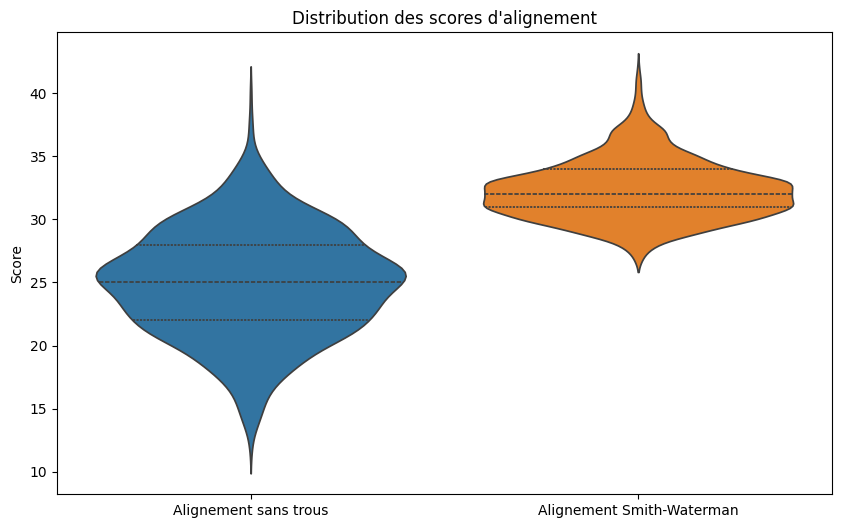

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

N = 100
R = 1000
p = 1/4

def generate_random_sequence(N):
    return ''.join(np.random.choice(['A', 'T', 'G', 'C'], N))

def score_without_gap(x, y, cmap, sigma):
    score = 0
    for i in range(len(x)):
        if x[i] == y[i]:
            score += 1
    return score

scores_no_gap = []
scores_sw = []

for _ in range(R):
    x = generate_random_sequence(N)
    y = generate_random_sequence(N)
    score_ng = score_without_gap(x, y, cmap, sigma)
    S, B = sw_fwd(x, y, rmap, sigma, go, ge)
    scores_no_gap.append(score_ng)
    scores_sw.append(np.max(S))

plt.figure(figsize=(10, 6))
sns.violinplot(data=[scores_no_gap, scores_sw], inner="quart")
plt.xticks([0, 1], ['Alignement sans trous', 'Alignement Smith-Waterman'])
plt.ylabel('Score')
plt.title('Distribution des scores d\'alignement')
plt.show()


Q3. Qu'observez-vous ?

```markdown
On observe que pour l'alignement sans trous, la distribution des scores est
beaucoup plus étendue, allant de 10 à plus de 40, avec une concentration des
scores autour de 25. Pour l'alignement avec trous, la distribution
est plus resserrée, avec un minimum au dessus de 25 et une concentration des
scores autour de 35 en moyenne.
```

Q4. Quelle conclusion peut-on en tirer sur la significativité d'un alignement ?

```markdown
L'alignement avec trous (Smith-Waterman) est plus significatif car il génère
des scores plus cohérents et plus élevés, trouvant des alignements locaux. En revanche, l'alignement sans trous créé des scores plus faibles, rendant les résultats moins cohérents.
```